In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import maup
from zipfile import ZipFile
import numpy as np
import os
import shutil

In [8]:
final.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'HOD_DIST', 'S16HODDEM',
       'S16HODREP', 'S16HODWRI', 'geometry'],
      dtype='object')

# State House Special Election

In [5]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [6]:
final = gpd.read_file('./vest_va_2016/va_2016_statehouse_special/va_2016_statehouse_special.shp')
final.head()

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S16HODDEM,S16HODREP,S16HODWRI,geometry
0,095,James City County,000101,Berkeley A,093,1109,1681,14,"POLYGON Z ((-76.82290 37.23270 0.00000, -76.81..."
1,095,James City County,000201,Jamestown A,093,490,409,3,"POLYGON Z ((-76.75462 37.26158 0.00000, -76.75..."
2,095,James City County,000501,Roberts A,093,860,608,3,"POLYGON Z ((-76.65883 37.20304 0.00000, -76.64..."
3,095,James City County,000502,Roberts B,093,914,1727,6,"POLYGON Z ((-76.70027 37.24874 0.00000, -76.70..."
4,095,James City County,000503,Roberts C,093,327,194,3,"POLYGON Z ((-76.68089 37.26080 0.00000, -76.68..."


In [7]:
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()

# Raw Election Results

### District 77

In [9]:
df77 = pd.read_csv('./vest_va_2016/Virginia_Elections_Database__2016_House_of_Delegates_General_Election_District_77_including_precincts.csv')

In [10]:
df77.head()

,County/City,Ward,Pct,"Clifton Eugene Hayes, Jr",All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,NaN,NaN
1,Chesapeake City,-,3 - Camelot,"1,831",27.0,"1,858"
2,Chesapeake City,-,5 - Crestwood,"1,394",35.0,"1,429"
3,Chesapeake City,-,8 - South Norfolk Recreation,"1,405",77.0,"1,482"
4,Chesapeake City,-,10 - Oscar Smith,647,47.0,694


In [11]:
df77['County/City'].nunique()

3

In [12]:
df77.shape

(31, 6)

In [13]:
df77 = df77.iloc[1:]
df77 = df77.drop(['Ward'], axis = 1)
df77['HOD_DIST'] = '77'
column_dict = {'County/City': 'LOCALITY', 'Clifton Eugene Hayes, Jr': 'S16HODDEM', 
               'All Others': 'S16HODWRI',
              'Michael Paul Mullin': 'S16HODDEM', 'Heather Lynn Cordasco': 'S16HODREP'
              }

df77['LOCALITY'] = df77['County/City']
df77['S16HODDEM'] = df77['Clifton Eugene Hayes, Jr']
df77['S16HODWRI'] = df77['All Others']
df77 = df77.drop(['County/City', 'Clifton Eugene Hayes, Jr', 'All Others'], axis = 1)

In [14]:
df77.head()

,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S16HODDEM,S16HODWRI
1,3 - Camelot,"1,858",77,Chesapeake City,"1,831",27.0
2,5 - Crestwood,"1,429",77,Chesapeake City,"1,394",35.0
3,8 - South Norfolk Recreation,"1,482",77,Chesapeake City,"1,405",77.0
4,10 - Oscar Smith,694,77,Chesapeake City,647,47.0
5,12 - Georgetown,"1,253",77,Chesapeake City,"1,217",36.0


In [15]:
df77.LOCALITY.nunique()

3

In [16]:
df77['COUNTYFP'] = df77['LOCALITY'].map(county_dict)

In [17]:
county_dict

{'James City County': '095',
 'York County': '199',
 'Chesapeake City': '550',
 'Newport News City': '700',
 'Suffolk City': '800',
 'Williamsburg City': '830'}

In [18]:
df77['LOCALITY'].value_counts()

Chesapeake City    20
Suffolk City        9
TOTALS              1
Name: LOCALITY, dtype: int64

In [19]:
df77.COUNTYFP.nunique()

2

In [20]:
df77.COUNTYFP.value_counts()

550    20
800     9
Name: COUNTYFP, dtype: int64

In [21]:
df77['S16HODDEM'] = df77['S16HODDEM'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df77['S16HODWRI'] = df77['S16HODWRI'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)

In [22]:
df77.groupby(['COUNTYFP']).sum()

,S16HODDEM,S16HODWRI
COUNTYFP,,
550,21701,793
800,5415,64


### District 93

In [23]:
df93 = pd.read_csv('./vest_va_2016/Virginia_Elections_Database__2016_House_of_Delegates_General_Election_District_93_including_precincts.csv')

In [24]:
df93.head()

,County/City,Ward,Pct,Michael Paul Mullin,Heather Lynn Cordasco,All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,Republican,NaN,NaN
1,James City County,-,101 - Berkeley A,886,"1,383",9.0,"2,278"
2,James City County,-,104- Berkeley D,324,341,1.0,666
3,James City County,-,201 - Jamestown A,391,337,2.0,730
4,James City County,-,501 - Roberts A,687,500,2.0,"1,189"


In [25]:
print(df93['County/City'].nunique())
df93 = df93.iloc[1:]
df93['HOD_DIST'] = '93'
df93['LOCALITY'] = df93['County/City']
df93['S16HODDEM'] = df93['Michael Paul Mullin']
df93['S16HODREP'] = df93['Heather Lynn Cordasco']
df93['S16HODWRI'] = df93['All Others']
df93 = df93.drop(['County/City', 'Michael Paul Mullin', 'Heather Lynn Cordasco', 'All Others', 'Ward'], axis = 1)

df93['COUNTYFP'] = df93['LOCALITY'].map(county_dict)
print(df93['COUNTYFP'].nunique())

df93['S16HODDEM'] = df93['S16HODDEM'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df93['S16HODREP'] = df93['S16HODREP'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df93['S16HODWRI'] = df93['S16HODWRI'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)

5
4


In [26]:
df93.COUNTYFP.value_counts()

700    11
095     9
199     5
830     4
Name: COUNTYFP, dtype: int64

In [27]:
df93.LOCALITY.value_counts()

Newport News City    11
James City County     9
York County           5
Williamsburg City     4
TOTALS                1
Name: LOCALITY, dtype: int64

In [28]:
df93.groupby(['COUNTYFP']).sum()

,S16HODDEM,S16HODREP,S16HODWRI
COUNTYFP,,,
095,5296,6499,31
199,1615,3148,14
700,8641,5475,35
830,4865,2512,17


In [29]:
df93.shape

(30, 8)

In [30]:
final.HOD_DIST.value_counts()

077    25
093    21
Name: HOD_DIST, dtype: int64

## Districts 77 and 93 together

In [31]:
elections = []
elections.append(df77)
elections.append(df93)
df = pd.concat(elections, axis = 0)

df = df[df['LOCALITY'] != 'TOTALS']

df = df.reset_index()

## Reallocate Absentee Votes

In [32]:
df93.COUNTYFP.value_counts()

700    11
095     9
199     5
830     4
Name: COUNTYFP, dtype: int64

In [33]:
df77.COUNTYFP.value_counts() #no overlap in counties so no need to incorporate district to reallocate

550    20
800     9
Name: COUNTYFP, dtype: int64

In [34]:
df = df.fillna(0)

In [35]:
def get_absentee_frac(prec_tot, county_tot, absentee_tot):
    '''A spec specifies in first line what function will do
    Returns fraction of county absentee votes for a precinct for a candidate
    
    Keyword arguments: (put inputs to funtions and say what they should be)
    precinct vote total for given candidate (int)
    county vote total for given candidate, absentee and provisional votes not included (int)
    absentee vote total for county for given candidate (int)
    
    "Pure function" bc only relies on inputs and outputs - only variables are ones that were passed as arguments
    '''
    if county_tot != 0:
        prec_frac = prec_tot/county_tot
        absentee_frac = prec_frac*absentee_tot
    else:
        absentee_frac = 0
    return absentee_frac

In [36]:
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
absentee_and_prov

,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S16HODDEM,S16HODWRI,COUNTYFP,S16HODREP
18,19,Ab - Central Absentee Precinct,"2,939",77,Chesapeake City,2867,72,550,0.0
19,20,Provisional,16,77,Chesapeake City,16,0,550,0.0
27,28,Ab - Central Absentee Precinct,877,77,Suffolk City,868,9,800,0.0
28,29,Provisional,3,77,Suffolk City,3,0,800,0.0
36,8,Ab - Central Absentee Precinct,"2,222",93,James City County,1066,9,095,1147.0
37,9,Provisional,6,93,James City County,1,1,095,4.0
47,19,Ab - Central Absentee Precinct,"1,145",93,Newport News City,776,3,700,366.0
48,20,Provisional,13,93,Newport News City,6,0,700,7.0
51,23,Ab - Central Absentee Precinct,898,93,Williamsburg City,545,0,830,353.0
52,24,Provisional,12,93,Williamsburg City,6,0,830,6.0


In [37]:
absentee_and_prov.COUNTYFP.nunique()

6

In [38]:
df.COUNTYFP.nunique()

6

In [39]:
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['COUNTYFP']).sum()
groupby_absentee_and_prov_tot

,index,S16HODDEM,S16HODWRI,S16HODREP
COUNTYFP,,,,
095,17,1067,10,1151.0
199,57,204,2,296.0
550,39,2883,72,0.0
700,39,782,3,373.0
800,57,871,9,0.0
830,47,551,0,359.0


In [40]:
groupby_county_df_tot = df.groupby(['COUNTYFP']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('COUNTYFP').sum()

In [41]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
for index, precinct_total_row_by_candidate in df_no_absent_or_provisional.iterrows():
    #print(precinct_total_row_by_candidate)
    county_fips = precinct_total_row_by_candidate['COUNTYFP']
    county_total_row_by_candidate_no_absentee = groupby_county_tot_no_absentee.loc[county_fips]
    county_absentee_and_provisional_by_candidate = groupby_absentee_and_prov_tot.loc[county_fips]
    #print(precinct_total_row_by_candidate, county_total_row_by_candidate_no_absentee, county_absentee_and_provisional_by_candidate)
    for candidate, votes in county_total_row_by_candidate_no_absentee.to_dict().items():
        prec_tot = precinct_total_row_by_candidate[candidate]
        #print('precinct total: ', prec_tot)
        county_tot = votes
        #print('county total: ', county_tot)
        absentee_tot = county_absentee_and_provisional_by_candidate[candidate]
        #print('absentee total: ', absentee_tot)
        absentee_frac = get_absentee_frac(prec_tot, county_tot, absentee_tot)
        #print('absentee votes to allocate to precinct: ', absentee_frac)
        prec_with_absentee_allocation = round(prec_tot + absentee_frac)
        #print('new precinct total: ', prec_with_absentee_allocation)
        df_with_absentee_reallocated.loc[index, candidate] = round(prec_with_absentee_allocation) #index is row, candidate is column

In [42]:
df_with_absentee_reallocated.shape

(46, 9)

In [43]:
final.shape

(46, 9)

## Check column sums

In [44]:
df_with_absentee_reallocated.columns

Index(['index', 'Pct', 'Total Votes Cast', 'HOD_DIST', 'LOCALITY', 'S16HODDEM',
       'S16HODWRI', 'COUNTYFP', 'S16HODREP'],
      dtype='object')

In [45]:
column_list = ['S16HODDEM', 'S16HODWRI', 'S16HODREP']

In [46]:
groupby_county_final = final.groupby('COUNTYFP').sum()
groupby_df_with_absentee_reallocated = df_with_absentee_reallocated.groupby('COUNTYFP').sum()
df_absentee_reallocate_with_final = pd.merge(groupby_df_with_absentee_reallocated, groupby_county_final, on = 'COUNTYFP', how = 'inner', suffixes = ('_x', '_y'))

In [47]:
def sum_checker(df, column_list):
    list_max = 0
    for i in column_list:
        left_sum = df[i+'_x'].sum()
        right_sum = df[i+'_y'].sum()
        if (left_sum == right_sum):
            print('column: ', i, ' have the same sums')
        
        else:
            diff = abs(left_sum - right_sum)
            percent = abs(left_sum - right_sum)/left_sum
            print('column: ', i)
            print('RDH sum is ', str(left_sum))
            print('Partner sum is ', str(right_sum))
            print('their (absolute) difference is ', str(diff))
            print('As a percentage of DF1 this is ', str(round(percent*100,5)) + '%')
            if (percent>list_max):
                list_max = percent
            print('')
    print('The max difference (as a percent of the total of on DF column is: ', str(round(list_max,5)))

In [48]:
sum_checker(df_absentee_reallocate_with_final, column_list)

column:  S16HODDEM
RDH sum is  47536.0
Partner sum is  47533
their (absolute) difference is  3.0
As a percentage of DF1 this is  0.00631%

column:  S16HODWRI
RDH sum is  955.0
Partner sum is  954
their (absolute) difference is  1.0
As a percentage of DF1 this is  0.10471%

column:  S16HODREP
RDH sum is  17635.0
Partner sum is  17634
their (absolute) difference is  1.0
As a percentage of DF1 this is  0.00567%

The max difference (as a percent of the total of on DF column is:  0.00105


In [49]:
(df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.Pct.str.slice(stop = 3)).nunique()

46

In [50]:
(final.COUNTYFP + final.VTDST.str.slice(start = 3)).nunique()

46

### Create unique id to enable merge

In [51]:
set(df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.Pct.str.slice(stop = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3))

{'55010 ',
 '55012 ',
 '55018 ',
 '55022 ',
 '55024 ',
 '55025 ',
 '55026 ',
 '55028 ',
 '55029 ',
 '5503 -',
 '55030 ',
 '55031 ',
 '55032 ',
 '55045 ',
 '55048 ',
 '5505 -',
 '55055 ',
 '5508 -',
 '8301 -',
 '8302 -'}

In [52]:
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [53]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated.head()

,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S16HODDEM,S16HODWRI,COUNTYFP,S16HODREP,vtdst
0,1.0,3 - Camelot,"1,858",77,Chesapeake City,2112.0,30.0,550,0.0,003
1,2.0,5 - Crestwood,"1,429",77,Chesapeake City,1608.0,38.0,550,0.0,005
2,4.0,8 - South Norfolk Recreation,"1,482",77,Chesapeake City,1620.0,85.0,550,0.0,008
3,5.0,10 - Oscar Smith,694,77,Chesapeake City,746.0,52.0,550,0.0,010
4,6.0,12 - Georgetown,"1,253",77,Chesapeake City,1403.0,40.0,550,0.0,012


In [54]:
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['vtdst']
df_with_absentee_reallocated.head()

,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S16HODDEM,S16HODWRI,COUNTYFP,S16HODREP,vtdst,unique_id
0,1.0,3 - Camelot,"1,858",77,Chesapeake City,2112.0,30.0,550,0.0,003,550003
1,2.0,5 - Crestwood,"1,429",77,Chesapeake City,1608.0,38.0,550,0.0,005,550005
2,4.0,8 - South Norfolk Recreation,"1,482",77,Chesapeake City,1620.0,85.0,550,0.0,008,550008
3,5.0,10 - Oscar Smith,694,77,Chesapeake City,746.0,52.0,550,0.0,010,550010
4,6.0,12 - Georgetown,"1,253",77,Chesapeake City,1403.0,40.0,550,0.0,012,550012


In [55]:
final['unique_id'] = final.COUNTYFP + final.VTDST.str.slice(start = 3)

In [56]:
print(set(df_with_absentee_reallocated.unique_id) - set(final.unique_id))
print(set(final.unique_id) - set(df_with_absentee_reallocated.unique_id))

set()
set()


# Shapefile

In [57]:
county_fips = []
for directory in os.listdir('./vest_va_2016/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])
        
proj = final.crs   

county_vtds = []
for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    print(i, ' added to list')
    county_vtds.append(vtd_shp)

global shp_vtd
shp_vtd = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

county_sldl = []
for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    sldl_ref = ref + i + '/PVS_19_v2_sldl_' + i + '.shp' #PVS_19_v2_sldl_51650
    sldl_shp = gpd.read_file(sldl_ref)
    print(i, ' added to list')
    county_sldl.append(sldl_shp)

global shp_sldl
shp_sldl = gpd.GeoDataFrame(pd.concat(county_sldl, axis = 0) , crs = proj) 

overlay = gpd.overlay(shp_sldl, shp_vtd, how='intersection', make_valid=True, keep_geom_type=True)
shp = overlay[(overlay.SLDLST == '077') | (overlay.SLDLST == '093')]

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

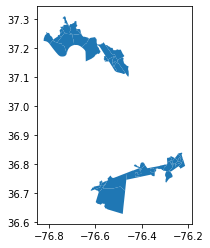

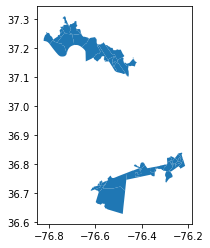

In [58]:
shp.plot()
final.plot()

In [59]:
shp.shape

(43, 42)

In [60]:
final.shape

(46, 10)

In [61]:
shp.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'SLDLST', 'NAMELSAD_1', 'LSAD_1', 'PARTFLG',
       'CHNG_TYPE_1', 'EFF_DATE', 'NEW_NAME', 'NEW_CODE', 'RELTYPE1',
       'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5', 'REL_ENT1', 'REL_ENT2',
       'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1', 'JUSTIFY_1', 'LSY',
       'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1', 'STATEFP_2', 'COUNTYFP_2', 'VTDST',
       'NAMELSAD_2', 'VTDI', 'LSAD_2', 'CHNG_TYPE_2', 'ORIG_NAME', 'ORIG_CODE',
       'RELATE_2', 'NAME_2', 'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC',
       'geometry'],
      dtype='object')

In [62]:
print((set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3))))
print((set(final.COUNTYFP + final.VTDST.str.slice(start = 3)) - set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3))))

{'095042', '095041'}
{'700108', '199401', '700211', '800601', '095104'}


In [74]:
final[final.unique_id == '095104']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S16HODDEM,S16HODREP,S16HODWRI,geometry,unique_id
34,095,James City County,000104,Berkeley D,093,406,414,1,"MULTIPOLYGON Z (((-76.75418 37.24672 0.00000, ...",095104


In [63]:
shp['unique_id'] = shp['COUNTYFP_1'] + shp['VTDST'].str.slice(start = 3)

/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


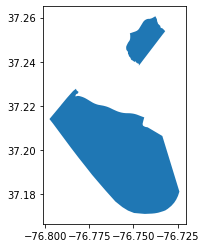

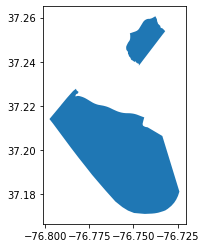

In [64]:
shp[(shp['unique_id'] == '095041') | (shp['unique_id'] == '095042')].plot()
final[final['unique_id'] == '095104'].plot()

In [65]:
id_095_dict = {'095041': '095104', '095042': '095104'}

In [66]:
shp['unique_id_1'] = shp['unique_id']
shp.loc[shp['unique_id'].isin(id_095_dict.keys()), 'unique_id'] = shp.loc[shp['unique_id'].isin(id_095_dict.keys()), 'unique_id'].map(id_095_dict)
shp.loc[shp['unique_id_1'].isin(id_095_dict.keys())]

/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,STATEFP_1,COUNTYFP_1,SLDLST,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_NAME,NEW_CODE,...,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,geometry,unique_id,unique_id_1
167,51,095,093,State House District 93,LL,Y,None,None,None,None,...,None,None,Berkeley D Part 1,90,S,None,G5240,"POLYGON Z ((-76.72393 37.18125 0.00000, -76.72...",095104,095041
1703,51,095,093,State House District 93,LL,Y,None,None,None,None,...,None,None,Berkeley D Part 2,90,S,None,G5240,"POLYGON Z ((-76.75393 37.24534 0.00000, -76.75...",095104,095042


In [67]:
shp = shp.dissolve(by = 'unique_id', as_index = False)

In [68]:
shp.loc[shp['unique_id_1'].isin(id_095_dict.keys())]

,unique_id,geometry,STATEFP_1,COUNTYFP_1,SLDLST,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,...,CHNG_TYPE_2,ORIG_NAME,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,unique_id_1
1,095104,"MULTIPOLYGON Z (((-76.72393 37.18125 0.00000, ...",51,095,093,State House District 93,LL,Y,None,None,...,None,None,None,None,Berkeley D Part 1,90,S,None,G5240,095041


In [69]:
print((set(shp.unique_id) - set(final.unique_id)))
print((set(final.unique_id) - set(shp.unique_id)))

set()
{'800601', '700211', '199401', '700108'}


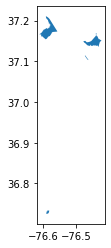

In [70]:
final[final['unique_id'].isin(['199401', '800601', '700211', '700108'])].plot()

In [73]:
set(final.unique_id) - set(df_with_absentee_reallocated.unique_id)

set()

In [71]:
final[final['unique_id'].isin(['199401', '800601', '700211', '700108'])]

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S16HODDEM,S16HODREP,S16HODWRI,geometry,unique_id
7,199,York County,000401,HARWOODS MILL,093,492,1369,5,"POLYGON Z ((-76.47686 37.14917 0.00000, -76.47...",199401
27,700,Newport News City,000108,Lee Hall,093,505,283,3,"POLYGON Z ((-76.61098 37.16711 0.00000, -76.60...",700108
30,800,Suffolk City,000601,LAKESIDE,077,251,0,0,"POLYGON Z ((-76.58167 36.73342 0.00000, -76.58...",800601
45,700,Newport News City,000211,Palmer,093,86,65,1,"POLYGON Z ((-76.46814 37.11123 0.00000, -76.46...",700211


### Join election results and shapefile

In [11]:
join = gpd.GeoDataFrame(pd.merge(df_with_absentee_reallocated, shp, on = 'unique_id', how = 'outer'), crs = proj)
join.plot()
final.plot()

NameError: name 'df_with_absentee_reallocated' is not defined

In [12]:
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S16HODDEM,S16HODREP,S16HODWRI,geometry
0,095,James City County,000101,Berkeley A,093,1109,1681,14,"POLYGON Z ((-76.82290 37.23270 0.00000, -76.81..."
1,095,James City County,000201,Jamestown A,093,490,409,3,"POLYGON Z ((-76.75462 37.26158 0.00000, -76.75..."
2,095,James City County,000501,Roberts A,093,860,608,3,"POLYGON Z ((-76.65883 37.20304 0.00000, -76.64..."
3,095,James City County,000502,Roberts B,093,914,1727,6,"POLYGON Z ((-76.70027 37.24874 0.00000, -76.70..."
4,095,James City County,000503,Roberts C,093,327,194,3,"POLYGON Z ((-76.68089 37.26080 0.00000, -76.68..."
5,199,York County,000202,KILN CREEK,093,675,1011,3,"POLYGON Z ((-76.50610 37.15413 0.00000, -76.50..."
6,199,York County,000303,EDGEHILL,093,448,768,6,"MULTIPOLYGON Z (((-76.49125 37.19585 0.00000, ..."
7,199,York County,000401,HARWOODS MILL,093,492,1369,5,"POLYGON Z ((-76.47686 37.14917 0.00000, -76.47..."
8,550,Chesapeake City,000003,Camelot,077,2112,0,30,"POLYGON Z ((-76.36447 36.77827 0.00000, -76.36..."
9,550,Chesapeake City,000025,St Julians,077,728,0,53,"POLYGON Z ((-76.34550 36.77248 0.00000, -76.34..."


# Validation

## Validating Shapefile

Here, I merge the shp joined to the election results to the final file to compare, rather than the raw shp to final as was done is previous VA files...

In [76]:
shp_final_merge = pd.merge(join, final, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'])

join['geometry'].geom_almost_equals(final['geometry'], decimal = 0)

shp_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_x')
final_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_y')
vals = shp_shapes.geom_almost_equals(final_shapes, decimal = 0)

In [77]:
print(vals.value_counts())

True     28
False    18
dtype: int64


550    5
800    4
700    4
199    3
830    1
095    1
Name: unique_id, dtype: int64


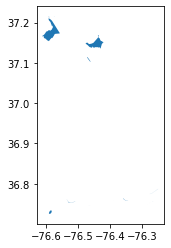

In [78]:
print(shp_final_merge[~vals]['unique_id'].str[0:3].value_counts())
diff_precincts = gpd.GeoDataFrame(shp_final_merge[~vals], geometry = 'geometry_x', crs = proj)

shp_difference = gpd.overlay(shp_shapes, final_shapes, how = 'symmetric_difference')
shp_difference.plot()

    index                        Pct Total Votes Cast HOD_DIST_x  \
0     1.0                3 - Camelot            1,858         77   
1     2.0              5 - Crestwood            1,429         77   
8    11.0            25 - St Julians              680         77   
13   17.0         31 - Carver School            1,560         77   
15   20.0             45 - Sunray II              477         77   
18   28.0          301 - White Marsh              334         77   
19   29.0       302 - John F Kennedy            1,263         77   
21   32.0  404 - Booker T Washington            1,175         77   
22   33.0             601 - Lakeside              211         77   
26    3.0            104- Berkeley D              666         93   
34   16.0             107 - Richneck            2,553         93   
35   17.0             108 - Lee Hall              727         93   
37   20.0            110 - Greenwood            2,173         93   
39   22.0               211 - Palmer            

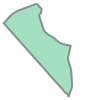

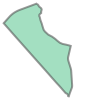

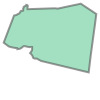

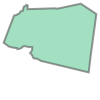

In [79]:
#Show a random difference
test = shp_final_merge[~vals].sample(axis = 0, n=1).index[0]
print(shp_final_merge[~vals])
display(shp_final_merge.iloc[test]['geometry_x'])
display(shp_final_merge.iloc[test]['geometry_y'])

test = shp_final_merge[~vals].sample(axis = 0).index[0]
display(shp_final_merge.iloc[test]['geometry_x'])
display(shp_final_merge.iloc[test]['geometry_y'])

### County 550 example

(18, 63)


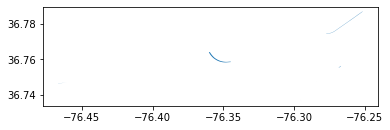

In [80]:
print(shp_final_merge[shp_final_merge['unique_id'].str[0:3] == '550'].shape)
ex_x = gpd.GeoDataFrame(shp_final_merge[shp_final_merge['unique_id'].str[0:3]== '550'], geometry = 'geometry_x', crs = proj)
ex_y = gpd.GeoDataFrame(shp_final_merge[shp_final_merge['unique_id'].str[0:3]== '550'], geometry = 'geometry_y', crs = proj)

gpd.overlay(ex_x, ex_y, how = 'symmetric_difference').plot()

## Validating Election Results

In [82]:
final.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'HOD_DIST', 'S16HODDEM',
       'S16HODREP', 'S16HODWRI', 'geometry', 'unique_id'],
      dtype='object')

In [83]:
column_list = ['S16HODDEM', 'S16HODREP', 'S16HODWRI']

In [84]:
#From Peter's MO
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            
            if(diff != 0):
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['unique_id'])
                if (diff>max_diff):
                    max_diff = diff
                    #add line to check percent from total vote difference is
                    perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100
                    print("New max diff is: ", str(max_diff))
                    print('% difference from VEST total is: ', str(perc_diff_from_vest))
                    print(df.iloc[j]['unique_id'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['unique_id'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
        #add line for % of total vote that difference is
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()

In [85]:
final_join_merge = pd.merge(join, final, on = 'unique_id', how = 'inner', suffixes = ['_x', '_y'])

In [86]:
validater_row(final_join_merge, column_list)

New max diff is:  1.0
% difference from VEST total is:  0.06222775357809583
550005
There are  46  total rows
20  of these rows have election result differences
26  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 5
